In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ef4f573deb6234c0deff1a98f65f8a3


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 3 | souillac
Processing Record 45 of Set 3 | klaksvik
Processing Record 46 of Set 3 | caloundra
Processing Record 47 of Set 3 | cabo san lucas
Processing Record 48 of Set 3 | lebu
Processing Record 49 of Set 3 | fortuna
Processing Record 50 of Set 3 | okhotsk
Processing Record 1 of Set 4 | holme
Processing Record 2 of Set 4 | codrington
Processing Record 3 of Set 4 | manggar
Processing Record 4 of Set 4 | zhangye
Processing Record 5 of Set 4 | bathsheba
Processing Record 6 of Set 4 | bagotville
Processing Record 7 of Set 4 | sandanski
Processing Record 8 of Set 4 | sept-iles
Processing Record 9 of Set 4 | east london
Processing Record 10 of Set 4 | hithadhoo
Processing Record 11 of Set 4 | tsogni
Processing Record 12 of Set 4 | gamba
Processing Record 13 of Set 4 | steinbach
Processing Record 14 of Set 4 | bambous virieux
Processing Record 15 of Set 4 | igbon
Processing Record 16 of Set 4 | ures
Processing Record 17 of Set 4 | carnarvon
Processing Record 18 of Set 4 | catalina
Process

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jurilovca,44.7667,28.8667,32.00,93,90,25.32,RO,2021-01-27 03:54:19
1,Busselton,-33.6500,115.3333,71.01,49,0,7.00,AU,2021-01-27 03:54:20
2,Upernavik,72.7868,-56.1549,0.18,86,81,10.65,GL,2021-01-27 03:54:20
3,Jamestown,42.0970,-79.2353,28.99,100,90,8.70,US,2021-01-27 03:54:20
4,Ushuaia,-54.8000,-68.3000,39.20,81,75,23.02,AR,2021-01-27 03:52:10
5,Lompoc,34.6391,-120.4579,50.00,62,90,4.61,US,2021-01-27 03:54:20
6,Butaritari,3.0707,172.7902,81.32,76,0,10.54,KI,2021-01-27 03:54:20
7,Hobart,-42.8794,147.3294,63.00,47,75,12.66,AU,2021-01-27 03:54:21
8,Tuktoyaktuk,69.4541,-133.0374,-14.80,76,90,14.97,CA,2021-01-27 03:54:21
9,Matagami,49.7502,-77.6328,6.80,92,90,5.75,CA,2021-01-27 03:54:22


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jurilovca,RO,2021-01-27 03:54:19,44.7667,28.8667,32.00,93,90,25.32
1,Busselton,AU,2021-01-27 03:54:20,-33.6500,115.3333,71.01,49,0,7.00
2,Upernavik,GL,2021-01-27 03:54:20,72.7868,-56.1549,0.18,86,81,10.65
3,Jamestown,US,2021-01-27 03:54:20,42.0970,-79.2353,28.99,100,90,8.70
4,Ushuaia,AR,2021-01-27 03:52:10,-54.8000,-68.3000,39.20,81,75,23.02
5,Lompoc,US,2021-01-27 03:54:20,34.6391,-120.4579,50.00,62,90,4.61
6,Butaritari,KI,2021-01-27 03:54:20,3.0707,172.7902,81.32,76,0,10.54
7,Hobart,AU,2021-01-27 03:54:21,-42.8794,147.3294,63.00,47,75,12.66
8,Tuktoyaktuk,CA,2021-01-27 03:54:21,69.4541,-133.0374,-14.80,76,90,14.97
9,Matagami,CA,2021-01-27 03:54:22,49.7502,-77.6328,6.80,92,90,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

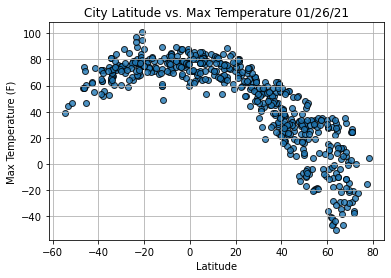

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

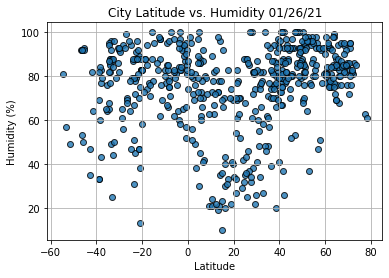

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

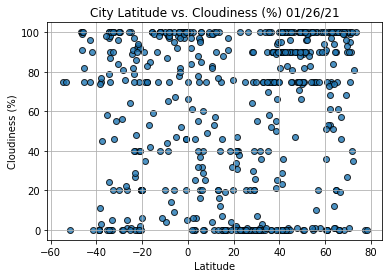

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

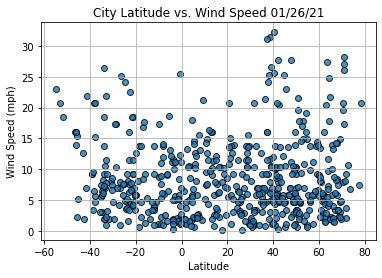

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()